## Project #1
## Create a Neural Network In Python

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from keras.utils import to_categorical
from numpy import exp

##Activation function:

In [ ]:
# Activation function:

def sigmoid(z):
 return 1.0/ (1.0+np.exp(-z))



## Accuracy:

In [ ]:
def Accuracy(outputs_outputLayer, test_target):
  out_target= []
  desired_target= []
  accuracy=0

  for i in range(len(test_target)):
      for j in range(0,3):
        desired_target.append(test_target[i,j])
        out_target.append(np.round(network_output[i][j]))
  for k in range(len( out_target)):
     if    desired_target[k] == out_target[k]:
       accuracy +=1
        
  acc = accuracy / len(desired_target) * 100
  return acc

## Loading Mnist Dataset:

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


##A helper displaying function:

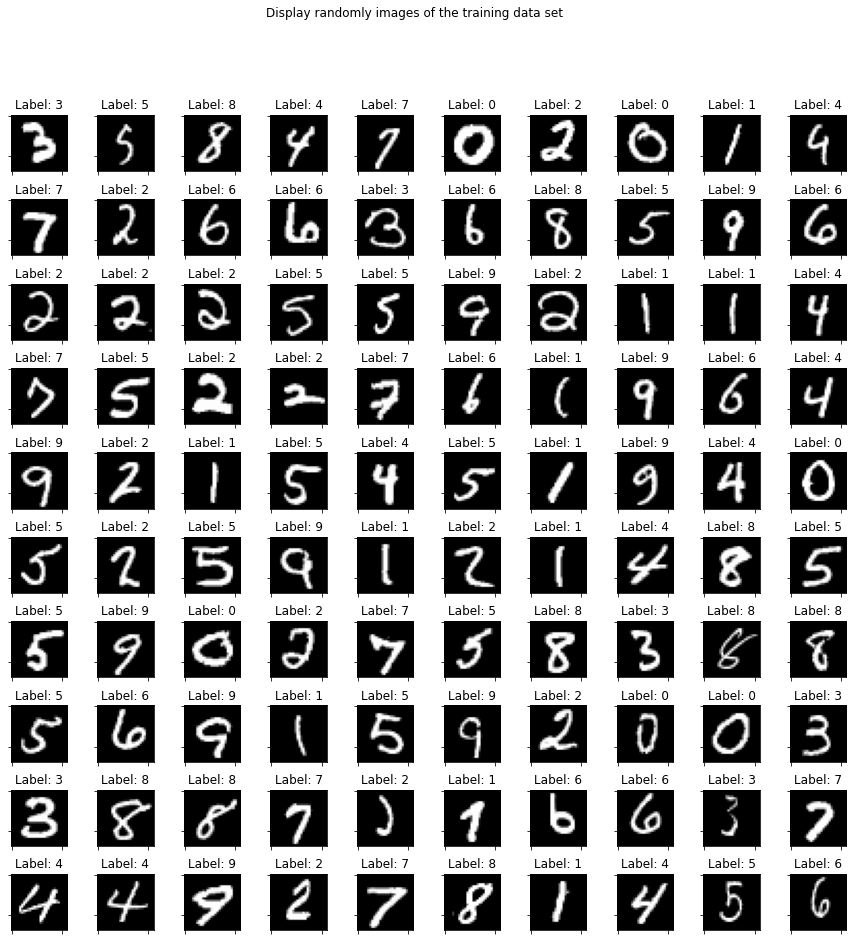

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X_train,y_train) 

## Preprocessing on mnist dataset:
1. Reshaping the data from 2D (image) to 1D (vector).
 
2. Normalizing the data.

In [ ]:

X_train= X_train.reshape(X_train.shape[0], 28*28)  #reshaping the data
X_test= X_test.reshape(X_test.shape[0], 28*28)

X_train = X_train/255     # normalizing data from (0-255) to (0-1) to make it easier for the network to learn
X_test = X_test/255 


print(X_train.shape)
print(X_test.shape)



(60000, 784)
(10000, 784)


##Neural_network:




- It consists of 2 hidden layers besides the output layer.
- Each layer is in the form of a dictionary where each key represents the number of the neutron and its values consist of (the neuron's weights, the net which is the summation of every weight of the neuron multiplied by the output from the previous layer, and the output of the neuron which is the net after passing it on an activation function (sigmoid function).

In [ ]:
def hidden_layer1_mnist(input1,w):
  weights1=[]
  w_hidden1=[]
  net= []
  Activated_output=[] 
  hidden_layer_dict = []
  temp_net=0

  # Assigning the weights for each neuron:

  for i in range(0,128):
   for j in range(0,100352,128):
     w_hidden1.append(w[i+j])   
   weights1.append(w_hidden1)
   w_hidden1=[]
   

 # calculating the net for each neuron:
 
  for i in range(0,128):
   for j in range(0,784):
     temp_net= temp_net+input1[j]*weights1[i][j]
   net.append(temp_net)
   temp_net=0

  # passing the net of each neuron to an activation function

  for i in range(0,128):
   Activated_output.append(sigmoid(net[i]))

  
  # putting each neuron in a dictionary

  for i in range(0,128):
    hidden_layer_dict.append({'neuron_weights':weights1[i],'Net': net[i],'output': Activated_output[i]})

  
  return hidden_layer_dict




In [ ]:
def hidden_layer2_mnist(input1,w):
  weights2=[]
  w_hidden2=[]
  net= []
  Activated_output=[] 
  hidden_layer_dict = []
  temp_net=0

  # Assigning the weights for each neuron:

  for i in range(0,64):
   for j in range(0,8192,64):
     w_hidden2.append(w[i+j])   
   weights2.append(w_hidden2)
   w_hidden2=[]


 # calculating the net for each neuron:

  for i in range(0,64):
   for j in range(0,128):
     temp_net= temp_net+input1[j]*weights2[i][j]
   net.append(temp_net)
   temp_net=0

  # passing the net of each neuron to an activation function

  for i in range(0,64):
   Activated_output.append(sigmoid(net[i]))

  
  # putting each neuron in a dictionary

  for i in range(0,64):
    hidden_layer_dict.append({'neuron_weights':weights2[i],'Net': net[i],'output': Activated_output[i]})

  
  return hidden_layer_dict




In [ ]:

def output_layer_mnist(input1,w):
  weights=[]
  w_hidden=[]
  net= []
  Activated_output=[] 
  output_layer_dict = []
  temp_net=0

  # Assigning the weights for each neuron:

  for i in range(0,10):
   for j in range(0,640,10):
     w_hidden.append(w[i+j])   
   weights.append(w_hidden)
   w_hidden=[]

 # calculating the net for each neuron:

  for i in range(0,10):
   for j in range(0,64):
     temp_net= temp_net+input1[j]*weights[i][j]
   net.append(temp_net)
   temp_net=0

  # passing the net of each neuron to an activation function

  for i in range(0,10):
   Activated_output.append(sigmoid(net[i]))
  

  # putting each neuron in a dictionary

  for i in range(0,10):
    output_layer_dict.append({'neuron_weights':weights[i],'Net': net[i],'output': Activated_output[i]})

  
  return output_layer_dict



In [ ]:
def feedforward_propagation_mnist(input,updated_w_output_layer,updated_w_hidden_layer1,updated_w_hidden_layer2):

  hidden_layer1_output=[]
  hidden_layer1_weights=[]
  hidden_layer2_weights=[]
  hidden_layer2_output=[]
  outputs_outputLayer=[]
  outputLayer_weights=[]
  temp=[]
  

  hidden_layer1_dict= hidden_layer1_mnist(input,updated_w_hidden_layer1)

  

  for j in range(len(hidden_layer1_dict)):
   hidden_layer1_output.append(hidden_layer1_dict[j]['output'])


  for j in range(len(hidden_layer1_dict)):
     for i in range(len(hidden_layer1_dict[1]['neuron_weights'])):
       temp.append(hidden_layer1_dict[j]['neuron_weights'][i])
     hidden_layer1_weights.append(temp)
     temp=[]

  hidden_layer2_dict= hidden_layer2_mnist(hidden_layer1_output,updated_w_hidden_layer2) 


  for j in range(len(hidden_layer2_dict)):
   hidden_layer2_output.append(hidden_layer2_dict[j]['output'])

 
  for j in range(len(hidden_layer2_dict)):
    for i in range(len(hidden_layer2_dict[1]['neuron_weights'])):
       temp.append(hidden_layer2_dict[j]['neuron_weights'][i])
    hidden_layer2_weights.append(temp)
    temp=[]


  outputLayer=output_layer_mnist(hidden_layer2_output,updated_w_output_layer)

  for j in range(len(outputLayer)):
   outputs_outputLayer.append(outputLayer[j]['output'])
  

  for j in range(len(outputLayer)):
    for i in range(len(outputLayer[1]['neuron_weights'])):
      temp.append(outputLayer[j]['neuron_weights'][i])
    outputLayer_weights.append(temp)
    temp=[]


  return (outputs_outputLayer,outputLayer_weights,hidden_layer1_output,hidden_layer1_weights,hidden_layer2_output,hidden_layer2_weights)




In [ ]:
def feedbackward_propagation_mnist(L1,L2,sample,outputs_outputLayer,outputLayer_weights,hidden_layer1_weights,hidden_layer1_output,hidden_layer2_output,hidden_layer2_weights,target):

   updated_w_output_layer,deltas_output_layer=updating_weights_output_layer(L2,outputs_outputLayer,outputLayer_weights,hidden_layer2_output,target)
   
   updated_w_hidden_layer2,deltas_hidden_layer2= updating_weights_hidden_layer(L2,hidden_layer1_output,hidden_layer2_output,deltas_output_layer,updated_w_output_layer,hidden_layer2_weights)
  
   updated_w_hidden_layer1, deltas_hidden_layer1= updating_weights_hidden_layer(L1,sample,hidden_layer1_output,deltas_hidden_layer2, updated_w_hidden_layer2,hidden_layer1_weights)
  
  
   return updated_w_output_layer,updated_w_hidden_layer1,updated_w_hidden_layer2


In [ ]:
def updating_weights_output_layer(L,outputs_outputLayer,outputLayer_weights,hidden_layer_output,target):
 
   deltas=[]
   delta_w=[]
   updated_w_output_layer=[]
   updated_w=0
   delta_w_j=0

    #calculating the deltas at the output layer  

   for j in range(len(target)):  
    delta_j = (target[j]-outputs_outputLayer[j])*(1-outputs_outputLayer[j])*outputs_outputLayer[j]
    deltas.append(delta_j)

    # updating output layer weights

   for j in range(len(deltas)):
     for i in range(len(hidden_layer_output)):
      delta_w_j=L*deltas[j]*hidden_layer_output[i]
      updated_w=outputLayer_weights[j][i]+delta_w_j
      delta_w.append(delta_w_j)
      updated_w_output_layer.append(updated_w)
      

   return updated_w_output_layer,deltas

In [ ]:
def updating_weights_hidden_layer(L,sample,hidden_layer_output,deltas_output_layer,output_weights,hidden_layer_weights):
  
  delta_j_hidden_layer=0
  delta_w_j_hidden=0
  updated_w_hidden=0
  deltas_hidden_layer=[]
  updated_w_hidden_layer=[]
  outputLayer_weights=[]
  temp=[]
  
  #calculating the deltas at the hidden layer 

  for i in range(len(deltas_output_layer)):
    for j in range(len(hidden_layer_output)):
      temp.append(output_weights[j])
    outputLayer_weights.append(temp)
    temp=[]


  for i in range(0,len(hidden_layer_output)):
    for j in  range(0,len(deltas_output_layer)):
      delta_j_hidden_layer= delta_j_hidden_layer+(deltas_output_layer[j]*outputLayer_weights[j][i])
      
    delta_j_hidden_layer= delta_j_hidden_layer*hidden_layer_output[i]*(1-hidden_layer_output[i])
    deltas_hidden_layer.append(delta_j_hidden_layer)
    delta_j_hidden_layer=0

    #  updating hidden layer weights

  for j in range(len(deltas_hidden_layer)):
   for i in range(len(sample)):
     delta_w_j_hidden=L*deltas_hidden_layer[j]*sample[i]
     updated_w_hidden=hidden_layer_weights[j][i]+delta_w_j_hidden
     updated_w_hidden_layer.append(updated_w_hidden)



  return updated_w_hidden_layer,deltas_hidden_layer


##Training the neural network on the mnist dataset:

In [ ]:
random.seed(30)

sample=0
target_out=[]
counter=0
w_hidden1= np.random.randn(100352)
w_hidden2= np.random.randn(8192)
w_output= np.random.randn(640)

L1= 0.4 # Learning_rate
L2=1 # Learning_rate

                                                                                                                          
for i in range(0,1000):
   
 sample= X_train[counter]
 target_out= y_train[counter]                                                                                    
                                                                                               
 outputs_outputLayer,outputLayer_weights,hidden_layer1_output,hidden_layer1_weights,hidden_layer2_output,hidden_layer2_weights =feedforward_propagation_mnist(sample,w_output,w_hidden1,w_hidden2)

 updated_w_output_layer,updated_w_hidden_layer1,updated_w_hidden_layer2=feedbackward_propagation_mnist(L1,L2,sample,outputs_outputLayer,outputLayer_weights,hidden_layer1_weights,hidden_layer1_output,hidden_layer2_output,hidden_layer2_weights, target_out)
                                                                                                                                                                                                    
 w_hidden1= updated_w_hidden_layer1
 w_hidden2= updated_w_hidden_layer2
 w_output= updated_w_output_layer

 counter+=1


## Testing the neural network usin mnist dataset:

In [ ]:
test_sample=[]
network_output=[]
accuracy=0

for i in range(200):

  test_sample= X_test[i]
  outputs_outputLayer,outputLayer_weights,hidden_layer1_output,hidden_layer1_weights,hidden_layer2_output,hidden_layer2_weights =feedforward_propagation_mnist(test_sample,w_output,w_hidden1,w_hidden2)

  network_output.append(outputs_outputLayer)

accuracy= Accuracy(network_output,y_test)
print(accuracy,"%")

90.0 %


## Refrence
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
